# PRE-PROCESSING
## BINARIZATION

### Fixed threshold binarization

For each pixel: if the pixel value is lower than the threshold (in this case 127), it is set to 0, otherwise it is set to a maximum value.

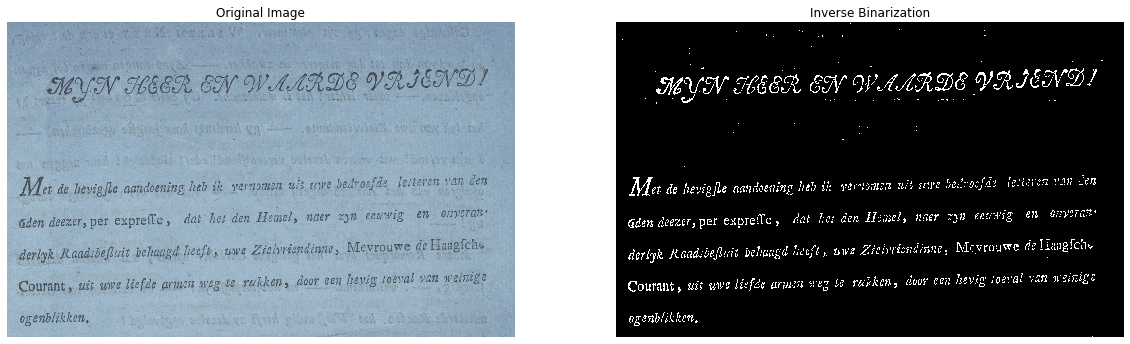

In [2]:
from Utils import *
from PreProcessing import * 
import cv2
from matplotlib import pyplot as plt

img_name='PR01.bmp'
path='images/'+img_name
img = cv2.imread(path)

img_bin = binarization('inverse', img)

plt.figure(figsize=(20,20))
plt.subplot(1,2,1),plt.imshow(img,'gray')
plt.title('Original Image'), plt.axis('off') 
plt.subplot(1,2,2),plt.imshow(img_bin,'gray')
plt.title('Inverse Binarization'), plt.axis('off')
plt.show()

### Otsu's method

The Otsu threshold is an adaptive threshold method: evaluates all pixels values (0 to 255), find the optimal threshold value to have the minimum variance.
We use the grayscale histogram to represent the distribution of the pixel value in the original image (between 0 and 255).

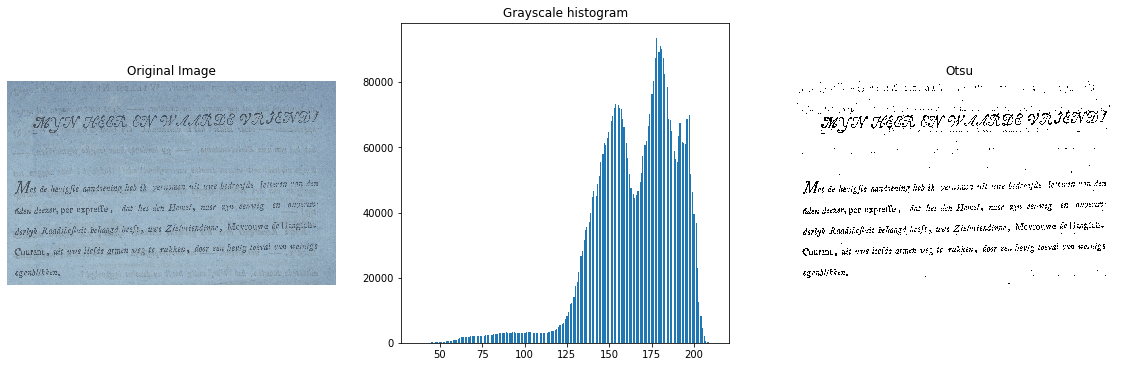

In [3]:
img_name='PR01.bmp'
path='images/'+img_name
img = cv2.imread(path)

img_bin = binarization('Otsu', img)

plt.figure(figsize=(20,20))
plt.subplot(3,3,1),plt.imshow(img,'gray')
plt.title('Original Image'), plt.axis('off')  
plt.subplot(3,3,2),plt.hist(img.ravel(),256)
plt.title('Grayscale histogram')
plt.subplot(3,3,3),plt.imshow(img_bin,'gray')
plt.title('Otsu'), plt.axis('off')
plt.show()

### Sauvola's method

Sauvola's method is a local binarization technique for images where the background is not uniform.
Multiple thresholds are calculated for each pixel using specific formulas considering the average and standard deviation of the neighbors (defined by a window centered around the pixel).

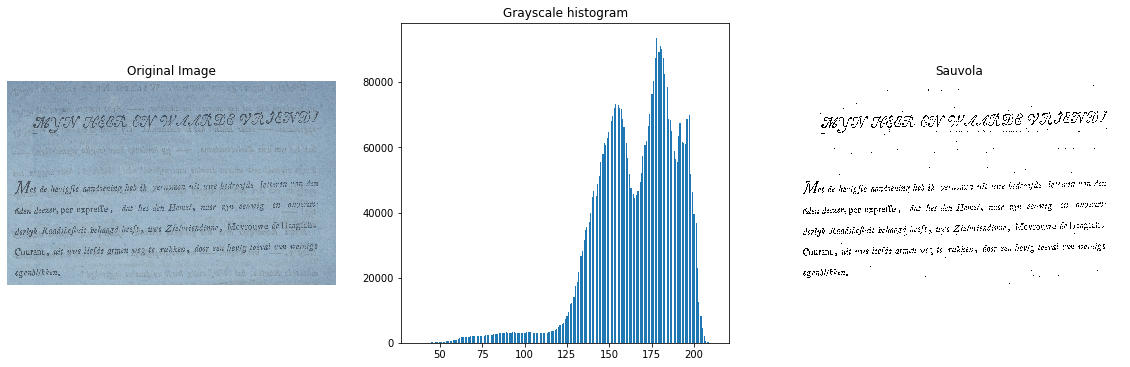

In [4]:
img_name='PR01.bmp'
path='images/'+img_name
img = cv2.imread(path)

img_bin = binarization('Sauvola', img)

plt.figure(figsize=(20,20))
plt.subplot(3,3,1),plt.imshow(img,'gray')
plt.title('Original Image'), plt.axis('off')  
plt.subplot(3,3,2),plt.hist(img.ravel(),256)
plt.title('Grayscale histogram')
plt.subplot(3,3,3),plt.imshow(img_bin,'gray')
plt.title('Sauvola'), plt.axis('off')
plt.show()

## CONNECTED COMPONENTS

The **connected components** are used in document recognition to segment and identify the elements in an image. The algorithm is iterative: labels an image based on the neighboring pixel. Two pixels are neighbour if they are connected, therefore 4 and 8 pixel connectivity is distinguished.


number of CC with connectivity 4: 48


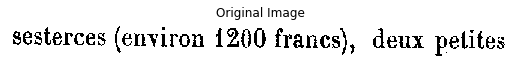

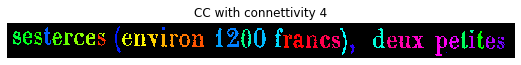

number of CC with connectivity 8: 44


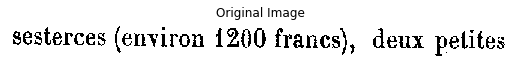

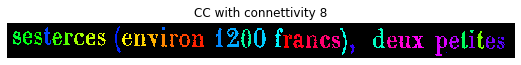

In [6]:
img_name='row.tif'
path='images/'+img_name
img = cv2.imread(path)

img_bin = binarization('Otsu', img)

showCC(img_bin,4)
showCC(img_bin,8)


## RLSA

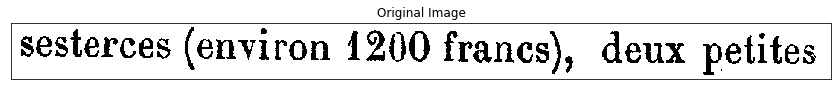

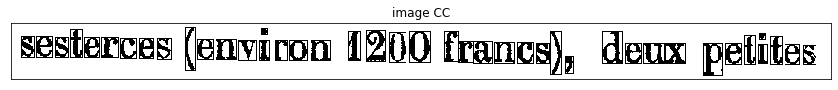

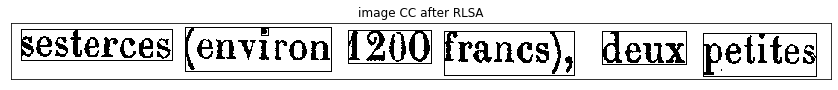

In [7]:
img_name='row.tif'
path='images/'+img_name
img = cv2.imread(path)
img_bin = binarization('Otsu', img)
img_copy=img_bin.copy()
img_copy2=img_bin.copy()

printContours(img_bin,img_copy,1)
valueH,_ = valueRLSA(img_bin)
img_rlsa_full = rlsa(img_copy.copy(), True, False, valueH)
printContours(img_rlsa_full,img_copy2,1)

titles = ['Original Image','image CC', 'image CC after RLSA']
images = [img, img_copy, img_copy2]

for i in range(3):
    plt.figure(figsize=(50,50))
    plt.subplot(1,3,i+1),plt.imshow((images[i]),'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

## HOUGH TRASFORM

Estimation of the rotation angle of the scanned page and rotate

The image is rotated of -1.26 degrees


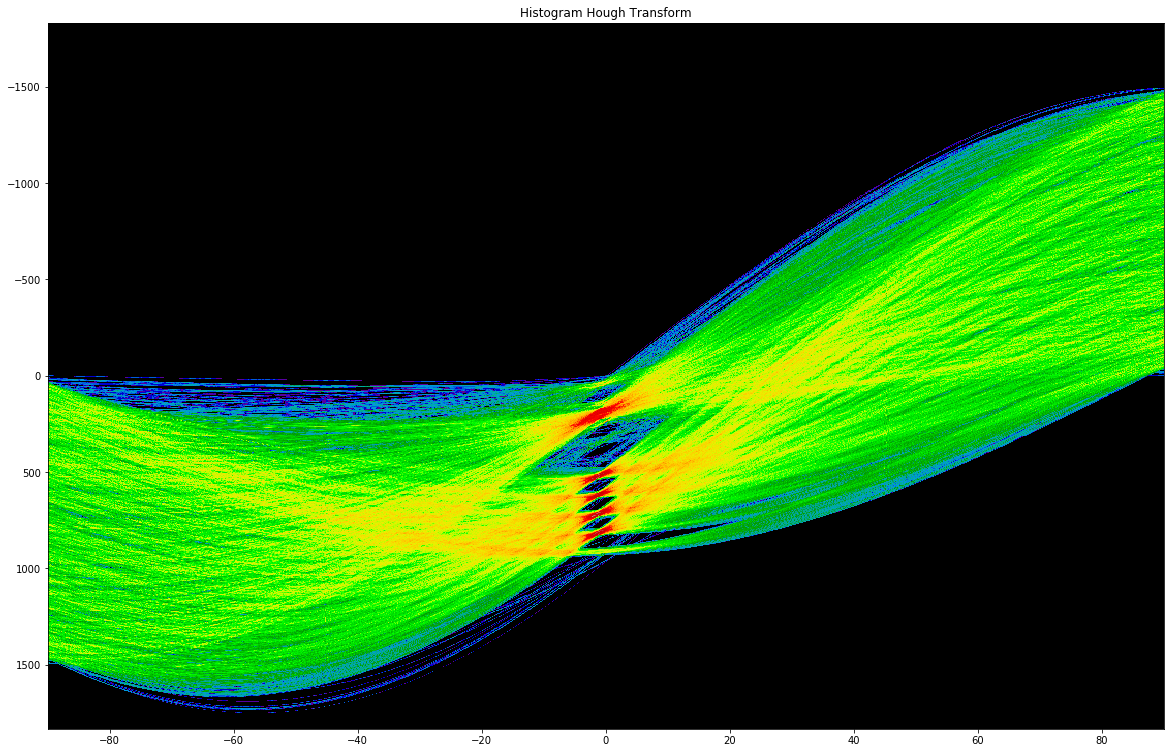

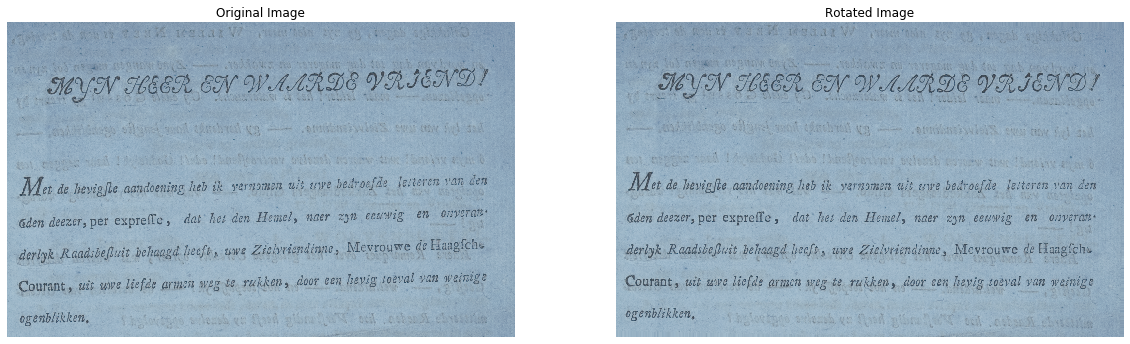

In [10]:
img_name='PR01.bmp'
path='images/'+img_name
img = cv2.imread(path)
img_bin = binarization('Otsu', img)
img_copy=img_bin.copy()

img_no_figures = removeFiguresOrSpots(img_bin,'figures')#img_rlsa_full
img_rotated, img_rotated_no_figures = houghTransformDeskew(img_no_figures,img,True)
cv2.imwrite(path[:-4]+'_rotated.tif', img_rotated)

plt.figure(figsize=(20,20))
plt.subplot(1,2,1),plt.imshow(img,'gray')
plt.title('Original Image'), plt.axis('off') 
plt.subplot(1,2,2),plt.imshow(img_rotated,'gray')
plt.title('Rotated Image'), plt.axis('off')
plt.show()

## PROJECTION

Evaluates the rotation angle of the scanned page, identifying the number of pixels per line and generating a histogram

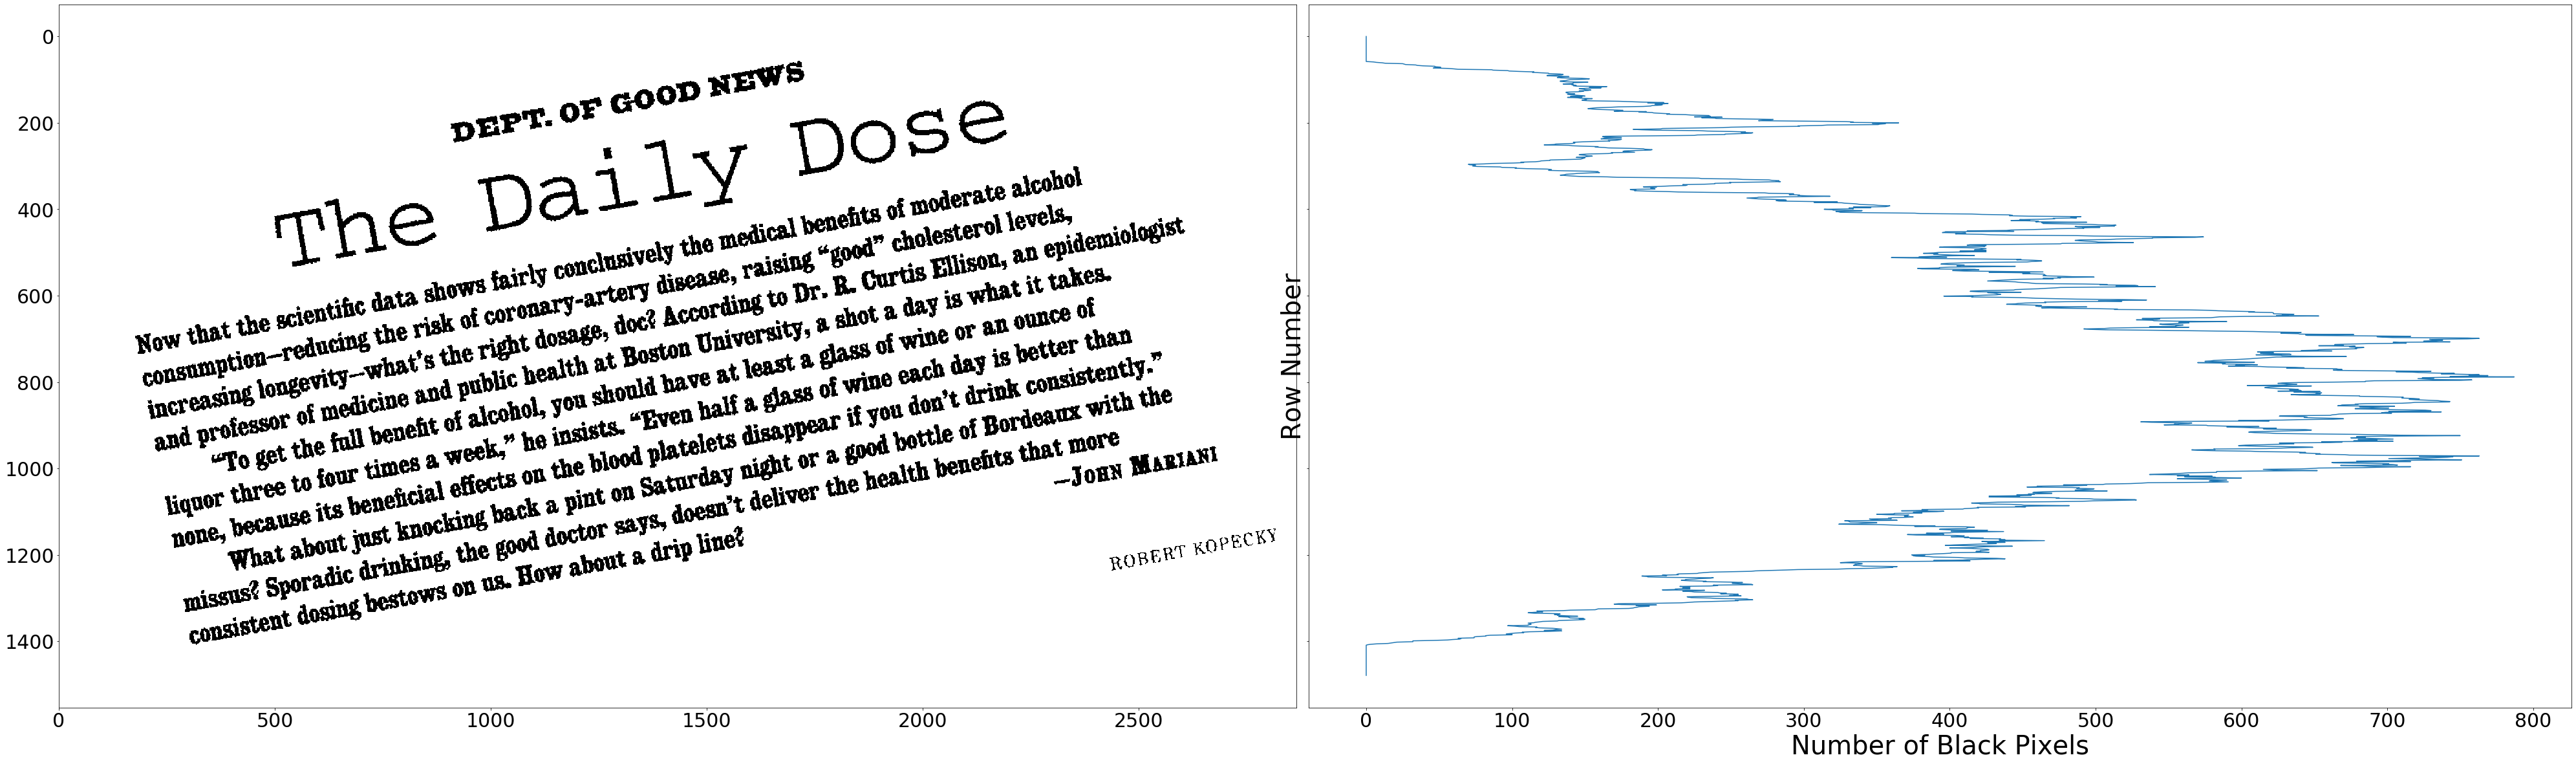

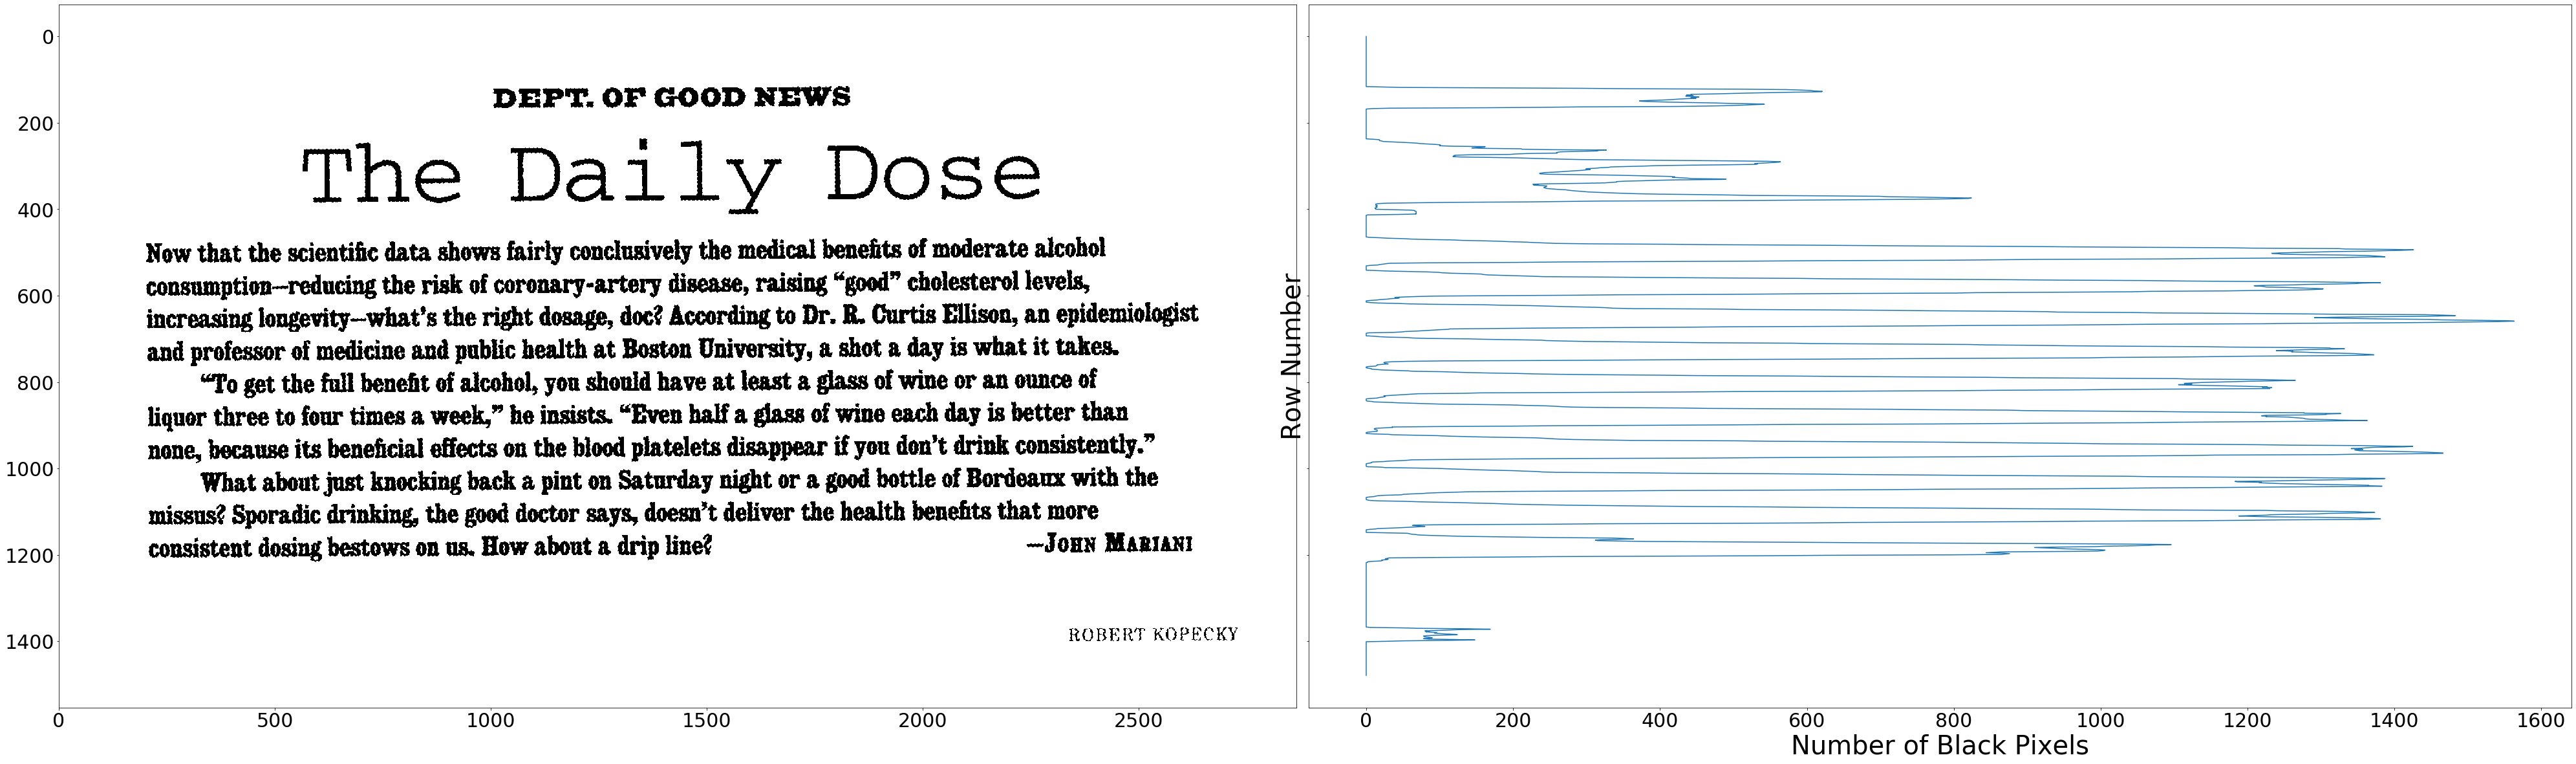

In [11]:
img_name='rot_rotated.tif'
img_name1='rot.png'
path='images/'+img_name
path1='images/'+img_name1
img = cv2.imread(path)
img1 = cv2.imread(path1)

img_bin = binarization('Otsu', img)
img_bin_A = removeFiguresOrSpots(img_bin,'spots')

img_bin1 = binarization('Otsu', img1)
img_bin1_A = removeFiguresOrSpots(img_bin1,'spots')

counts, row_number = projection(img_bin)
counts1, row_number1 = projection(img_bin1)

showProjection(img_bin1_A,counts1,row_number1)
showProjection(img_bin_A,counts,row_number)